<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
#Splitting Data for tain_test, and CV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)#splitting in the ratio of 60:40
X_CV, X_test, y_CV, y_test = train_test_split( X_test, y_test, test_size=0.5, random_state=42)#splitting in the ration 60,20,20

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [4]:
# you can write your code here

In [5]:
clf=SVC(gamma=0.001,C=100,kernel='rbf')
clf.fit(X_train,y_train)#Trainig the SVC model

SVC(C=100, gamma=0.001)

In [6]:
def k(xi,xq,gamma):#kernel function that 
    temp=0
    from math import exp
    x=xq-xi
    x=x**2
    x=x*gamma
    x=sum(x)
    return exp(-x)#return a value
        


In [7]:
def decision_function(X_CV,model,SV,gamma):
    fcr=[]
    for xq in X_CV:# for every point in X_CV
        temp=0#storing in a variable to sum up with all the SV vectors
        for a,xi in zip(model.dual_coef_.flatten(),SV):
            temp=temp+(a*(k(xi,xq,gamma)))
        fcr.append(temp+model.intercept_[0])
    return fcr
#SV----> support vectors of size 5 dimensions
#a----> yi*alphai we can get this value from model.dual_coef_


In [8]:

SV=clf.support_vectors_
temp2=decision_function(X_CV,clf,SV,0.001)

In [9]:
temp=clf.decision_function(X_CV)


In [10]:
print(f'Number of points equal in both the sets = {(temp==temp2).sum()}')
fcv=temp2

Number of points equal in both the sets = 979


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [11]:
Y_plus=(y_train[y_train==1].sum()+1)/(y_train[y_train==1].sum()+2)
Y_minus=1/(y_train[y_train==0].sum()+2)

In [12]:
t = lambda x,y_plus,Y_minus: Y_plus if x==1 else Y_minus

In [13]:
f_cv_Y=np.array([t(x,Y_plus,Y_minus) for x in y_CV])

In [14]:
f_cv_X=decision_function(X_CV,clf,SV,0.001)

In [15]:
b=0
w=0

In [16]:
print(b)
print(w)

0
0


In [17]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)


In [18]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_li`ke function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w=np.zeros_like(row_vector)
    b=0
    return w,b

In [19]:

#make sure that the sigmoid function returns a scalar value, you can use dot function operation
def gradient_dw(x,y,w,b,alpha,N,eta):
    '''In this function, we will compute the gardient w.r.to w '''
    #temp1=np.sum(np.dot(w.T,x),b)
    temp=np.dot(w.T,x) + b
    si=sigmoid(temp)
    temp2=np.subtract(y,si)
    temp3=np.multiply(x,temp2)
    learning_rate=eta
    temp4=learning_rate/N  * w
    dw=np.subtract(temp3,temp4)    
    return dw

In [20]:
from math import exp
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1/(1+exp(-z))
#sb should be a scalar value
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     temp=np.dot(w.T,x) + b
     si=sigmoid(temp)
     db=np.subtract(y,si) 
     return db
import numpy as np
def logloss(y_true,y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    #while dealing with numpy arrays you can use vectorized operations for quicker calculations as compared to using loops
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/
    #write your code here
    y_true2=np.ones_like(y_true)
    y_pred2=np.ones_like(y_pred)
    y_true3=np.subtract(y_true2,y_true)
    y_pred3=np.subtract(y_pred2,y_pred)
    loss= np.sum(np.add(np.multiply(y_true, np.log10(y_pred)), np.multiply(y_true3 , np.log10(y_pred3))))
    return -1*loss/len(y_true)

In [21]:
def train(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''    
    train_loss = []
    w,b = initialize_weights(X_train[0])# Initialize the weights
    tempw,tempb=0,0
    #write your code to perform SGD
    N=len(f_cv_X)
    for i in range(epochs):
        for x,y in zip(X_train,y_train):# for every data point(X_train,y_train)
            dw=gradient_dw(x,y,w,b,alpha,N,eta0)          #compute gradient w.r.to w (call the gradient_dw() function)
            db=gradient_db(x,y,w,b)      #compute gradient w.r.to b (call the gradient_db() function)
            w=w+(alpha*dw)  #update w, b
            b=b+(alpha*db)
        predect=pred(w,b,X_train)
        losst=logloss(y_train,predect)
        train_loss.append(losst)    
    return train_loss

In [22]:
train_loss=train(f_cv_X,f_cv_Y,20,0.01,0.001)

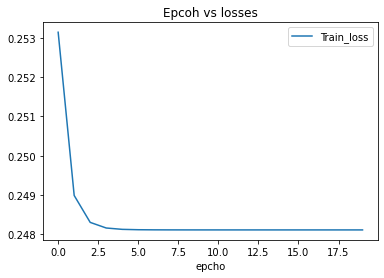

In [23]:
X=[i for i in range(20)]
Y=train_loss
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.xlabel('epcho')
plt.legend(['Train_loss','Test_loss'])
plt.title('Epcoh vs losses')
plt.show()

In [24]:
ftest=decision_function(X_test,clf,SV,0.001)

In [25]:
from math import exp
def exp_fun(w,b,ftes):
    temp=ftes  + b
    return 1/(exp(-temp))

In [26]:
temp=[]
for i in ftest:
    temp.append(exp_fun(w,b,i))


In [27]:
print(temp)

[0.1990384349125596, 0.13042038667622374, 0.4548684318170676, 0.11002794978555795, 0.022129427427553586, 0.04689348272639252, 0.08789884098149284, 18.576051063634427, 0.03406817979518741, 3.5341694893532902, 0.11885283286147293, 2.7118709911361925, 0.612858925288496, 0.13255236828954559, 0.4736916150793697, 28.19836823904677, 0.03771499011667371, 0.051060772424962826, 0.29212513701967496, 0.05696777146597392, 6.892176620433089, 0.1218779788855356, 5.188133390254035, 0.2938303205563454, 0.1148574019159291, 2.0408286084771925, 5.653544431621272, 0.4119203343204511, 0.060557436281172924, 2.6226400676346726, 0.11316094242444578, 10.013053940665682, 0.172796554667986, 0.030208614196050393, 0.05200957785305591, 0.25603054949564397, 0.28408325796502804, 0.09715455445164181, 7.302077405625844, 0.03418550011148117, 0.014629537901782603, 1.458793145778746, 0.10317810228291979, 0.04771389003594695, 0.048337353496522004, 0.16768508116257577, 0.05391680737421425, 0.08238662952488662, 4.250052342065